In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Mall_Customers.csv")
X = df.iloc[:, [3, 4]].values

In [3]:
def init_centroids(npx, centroids):
    cf = []
    maxd = 0
    for ix in npx:
        dist = list(np.sqrt(np.sum(np.square(ix-centroids[j]))) for j in range(len(centroids)))
        d = sum(dist)
        if(d>= maxd): 
            maxd = d
            cf = ix
    return cf

In [4]:
def find_closest_centroids(X, centroids):
    idx = np.zeros((len(X),), dtype = int)
    for i in range(len(idx)):
        d = []
        for j in range(len(centroids)):
            dj = np.sqrt(sum(np.square(X[i] - centroids[j])))
            d.append(dj)
        idx[i] = np.argmin(d)
    return idx

In [5]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K,n))
    for i in range(K):
        points = X[idx == i]
        centroids[i] = np.mean(points, axis = 0)
    return centroids

In [6]:
niter = 100
npx = np.array(X)
centroids = []
centroids.append(X[0])
for i in range(4):
    centroids.append(init_centroids(npx, centroids))
print(centroids)
for i in range(niter):
    idx = find_closest_centroids(X, centroids)
    centroids = compute_centroids(X, idx, len(centroids))
print(idx)
print(centroids)
y_kmeans = idx

[array([15, 39], dtype=int64), array([137,  83], dtype=int64), array([137,  18], dtype=int64), array([19, 99], dtype=int64), array([19,  3], dtype=int64)]
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


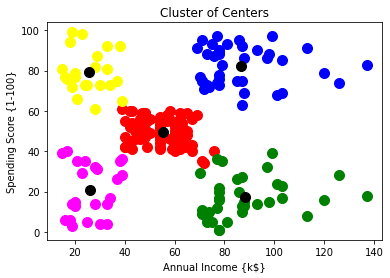

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, color = 'red')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, color = 'blue')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, color = 'green')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, color = 'yellow')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, color = 'magenta')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'black')
plt.title("Cluster of Centers")
plt.xlabel("Annual Income {k$}")
plt.ylabel("Spending Score {1-100}")
plt.show()